In [28]:
#importing libraries and reading data
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
import math
df = pd.read_csv("D:\\code\\School\\Capstone\\train.csv")

In [2]:
#viewing data head
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#dropping duplicates
df = df.drop_duplicates(['Id'])

In [4]:
df = df.drop(['Id','Alley', 'Utilities', 'PoolQC', 'Fence', 'MiscFeature', 'Neighborhood'], axis = 1)

for col in df.columns:
    print(col)

X = df[['MSSubClass',
'MSZoning',
'LotFrontage',
'LotArea',
'Street',
'LotShape',
'LandContour',
'LotConfig',
'LandSlope',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'MasVnrArea',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinSF1',
'BsmtFinType2',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'KitchenQual',
'TotRmsAbvGrd',
'Functional',
'Fireplaces',
'FireplaceQu',
'GarageType',
'GarageYrBlt',
'GarageFinish',
'GarageCars',
'GarageArea',
'GarageQual',
'GarageCond',
'PavedDrive',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold',
'YrSold',
'SaleType',
'SaleCondition',
'SalePrice']]

In [5]:
#getting dummies for variables
df = pd.get_dummies(df)

In [6]:
test_sample = pd.read_excel("D:\code\School\Capstone\capstone mini_sample.xlsx")

for col in df.columns:
    print(col)

(array([  9.,   6.,  37., 122.,  83., 128., 261., 223., 139., 452.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <BarContainer object of 10 artists>)

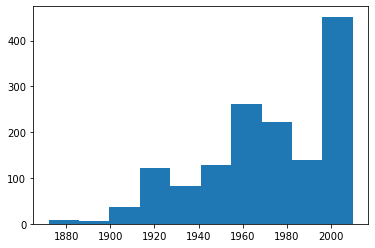

In [7]:
#viewing distribution of year built
plt.hist(df['YearBuilt'])

(array([314.,   0., 329.,   0.,   0., 304.,   0., 338.,   0., 175.]),
 array([2006. , 2006.4, 2006.8, 2007.2, 2007.6, 2008. , 2008.4, 2008.8,
        2009.2, 2009.6, 2010. ]),
 <BarContainer object of 10 artists>)

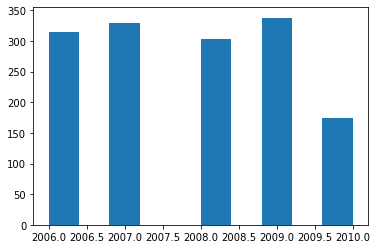

In [8]:
#viewing distribution of year sold
plt.hist(df['YrSold'])

#all sales occured between 2006 and 2010

In [9]:
sb.jointplot(df['YrSold'], df['SalePrice'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Error in callback <function flush_figures at 0x000002315EFAC430> (for post_execute):


KeyboardInterrupt: 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


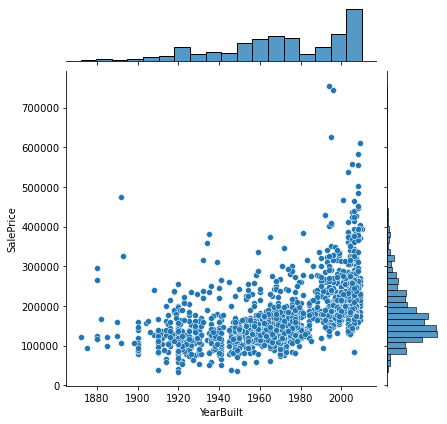

In [10]:
sb.jointplot(df['YearBuilt'], df['SalePrice'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyboardInterrupt: 

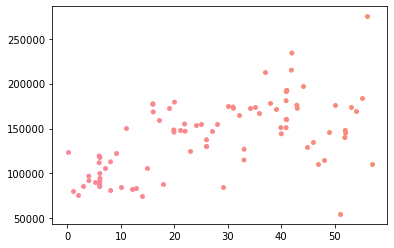

In [11]:
sb.stripplot(df['LotArea'], df['SalePrice'])

In [ ]:
sb.stripplot(df['YearBuilt'], df['OverallCond'])

In [ ]:
cor = df.corr()
sb.heatmap(cor, annot=True)

In [12]:
X = test_sample[['MoSold', 'YrSold']]

In [13]:
Y = test_sample[['SalePrice']]

In [ ]:
X = [['MoSold', 'YrSold']]

In [ ]:
Y = [['SalePrice']]

X = np.array(X)
Y = np.array(Y)

In [ ]:
df.dtypes

# logit_model = sm.Logit(endog = Y, exog = X)

#creating logistic regression model
logit_model = sm.Logit(Y, X)
result = logit_model.fit()
print(result.summary())

In [18]:
#setting up linear model to use for predictions
regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [19]:
model = sm.OLS(Y, X)

In [20]:
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.706
Method:                 Least Squares   F-statistic:                              13.00
Date:                Sat, 05 Feb 2022   Prob (F-statistic):                     0.00307
Time:                        11:43:24   Log-Likelihood:                         -98.786
No. Observations:                  10   AIC:                                      201.6
Df Residuals:                       8   BIC:                                      202.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [22]:
#using model to make predictions 
initial_predictions = [ ]
initial_predictions = regr.predict(X)
print(initial_predictions)

[[ 8222.9601518 ]
 [11418.02656546]
 [11713.09297913]
 [ 4437.76091082]
 [ 8050.09487666]
 [ 9698.29222011]
 [ 6035.29411765]
 [ 6798.29222011]
 [10410.62618596]
 [ 7215.5597723 ]]


In [23]:
SalePriceList = test_sample['SalePrice']

In [24]:
#creating program to calculate residual error
def RSE(initial_predictions, SalePriceList):
    y_true = np.array(SalePriceList)
    y_predicted = np.array(initial_predictions)
    RSS = np.sum(np.square(y_true - y_predicted))
    rse = math.sqrt(RSS / len(y_true - 2))
    print(rse)

In [26]:
#converting lists to arrays 
y_true = np.array(SalePriceList)
y_predicted = np.array(initial_predictions)

In [29]:
#calculating residual standard error
print(RSE(y_true, y_predicted))

17106.331151503393
None
